## 1. Imports

Import the libraries to process the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Read Data

Read in the data for each test result.

In [5]:
# The data is stored in a 5XX.csv for the serial tests, and 6XX.csv for the parallel tests
# The data files are in the `/data` folder
DIRECTORY = "data/page-tracking-test"

# A structure for storing the data
all_data = {}

for i in range(500, 600):
    if os.path.isfile(f"{DIRECTORY}/{i}.csv"):
        all_data[i] = pd.read_csv(f"{DIRECTORY}/{i}.csv")
        print(f"Loaded data for test {i}")

Loaded data for test 505
Loaded data for test 508
Loaded data for test 511
Loaded data for test 521
Loaded data for test 525
Loaded data for test 538
Loaded data for test 544


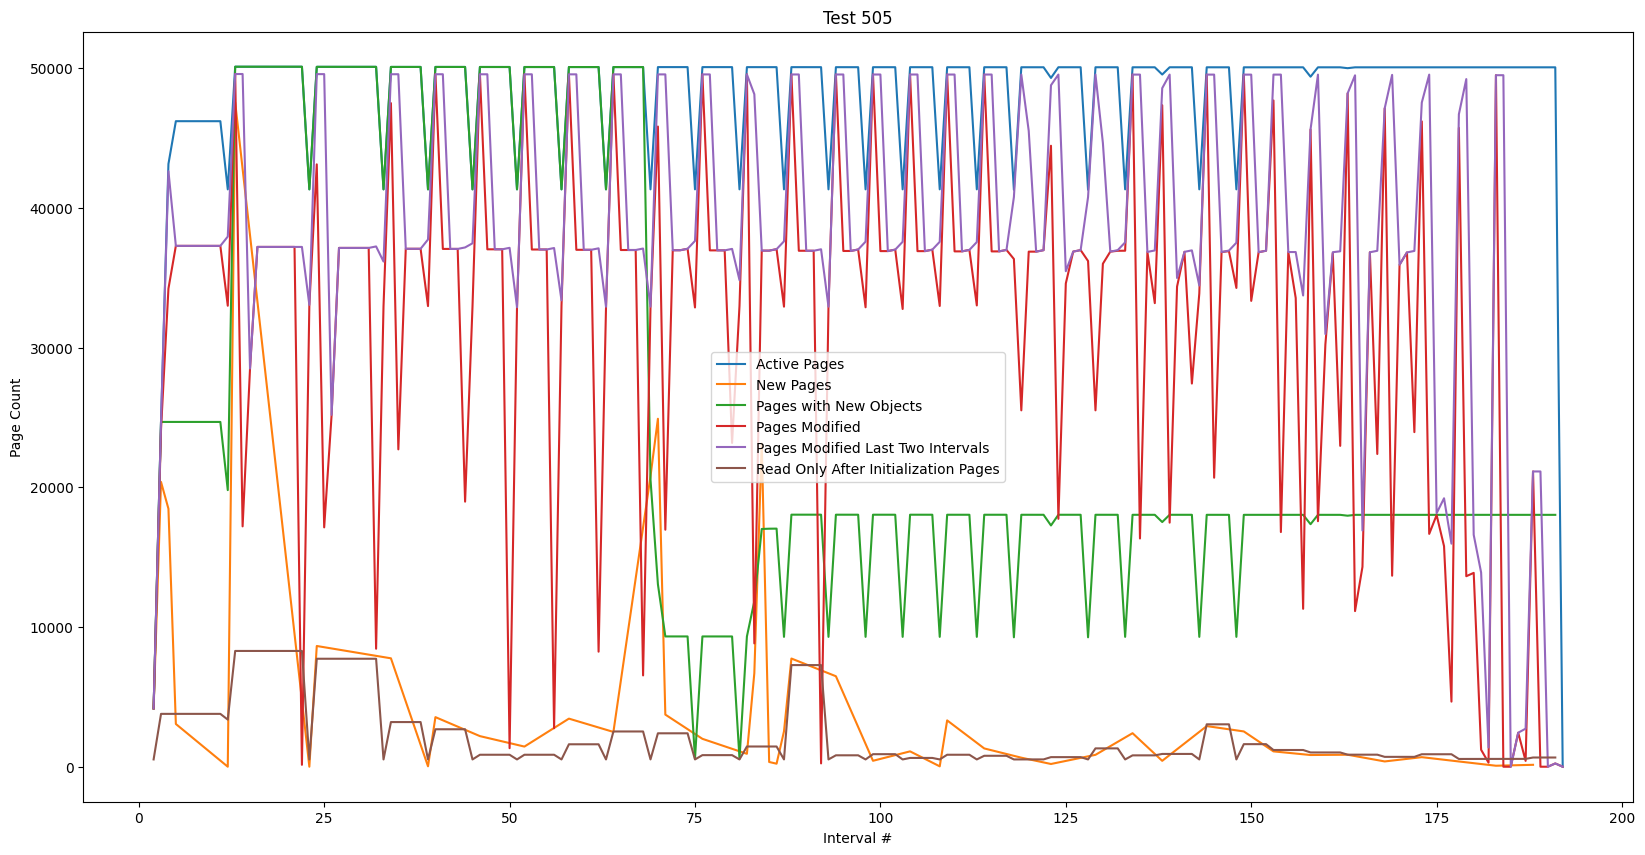

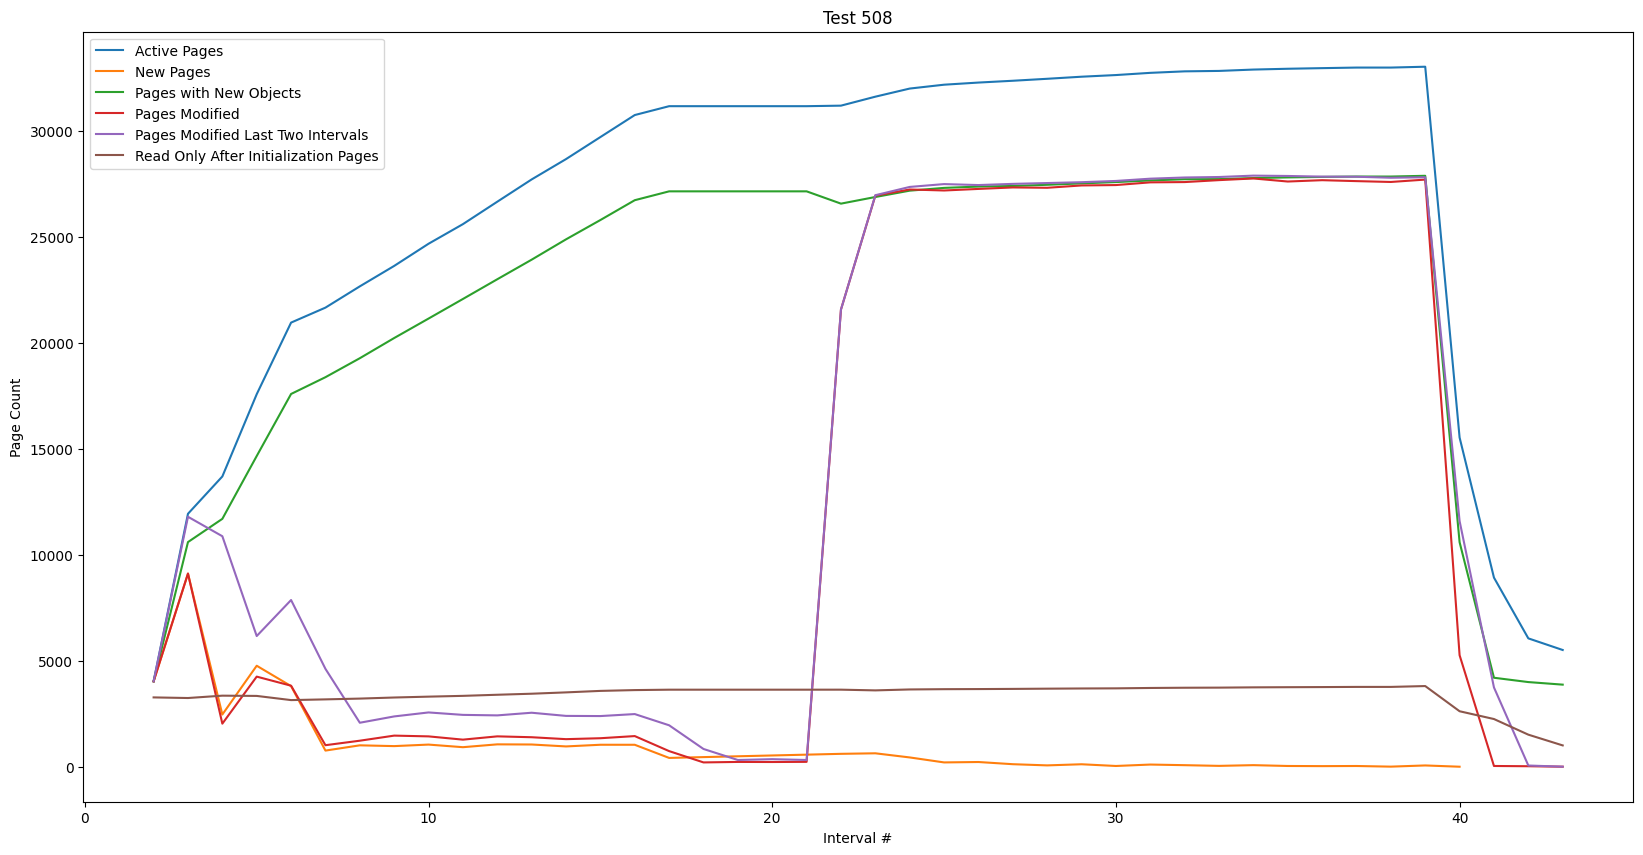

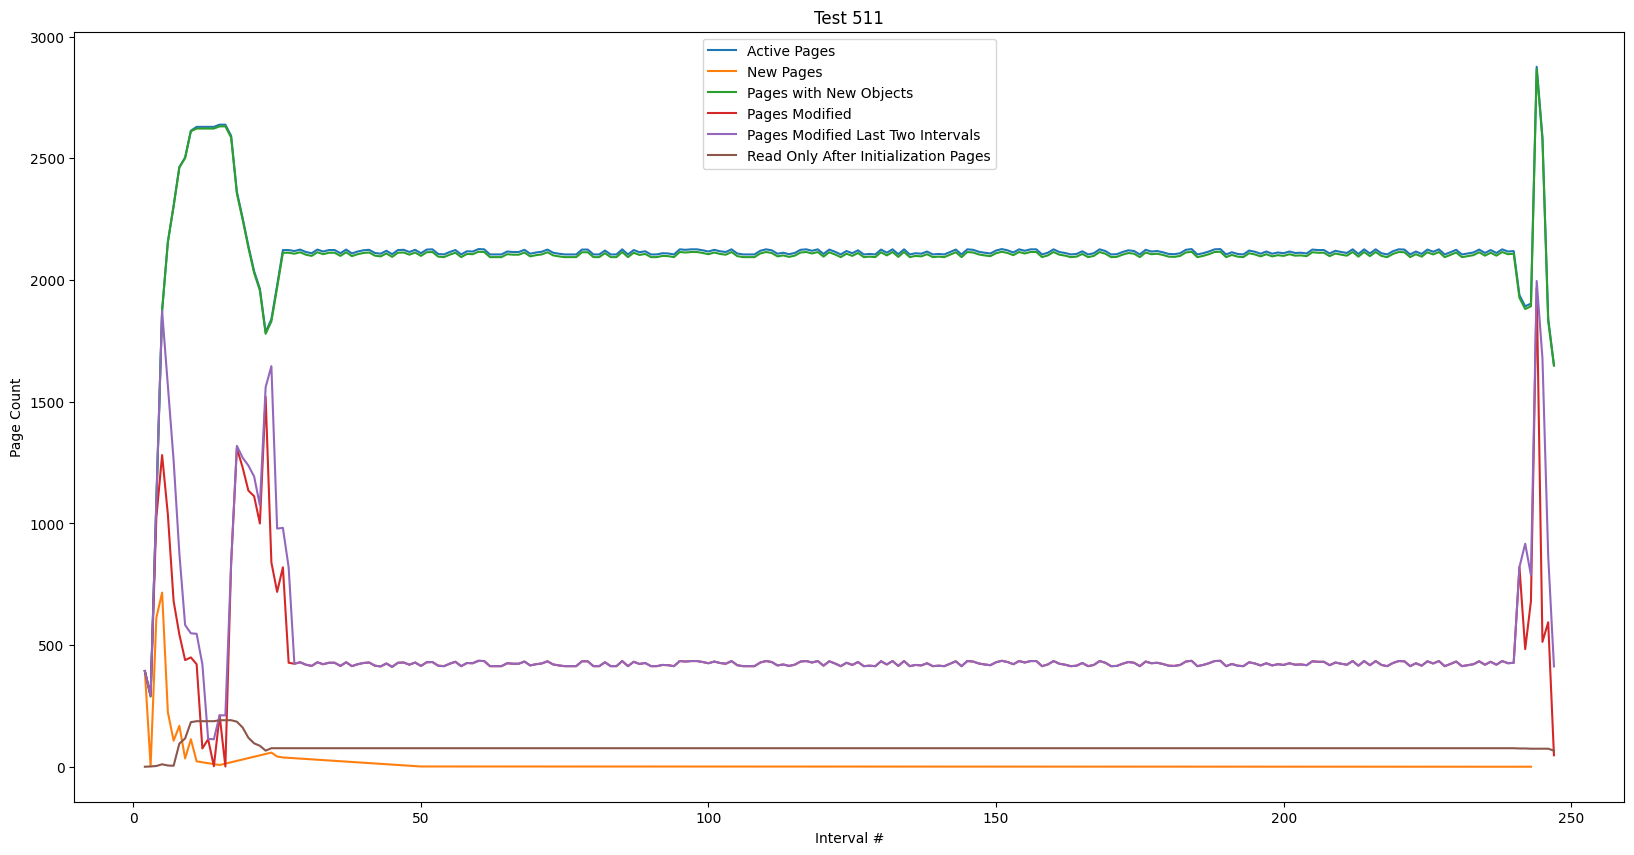

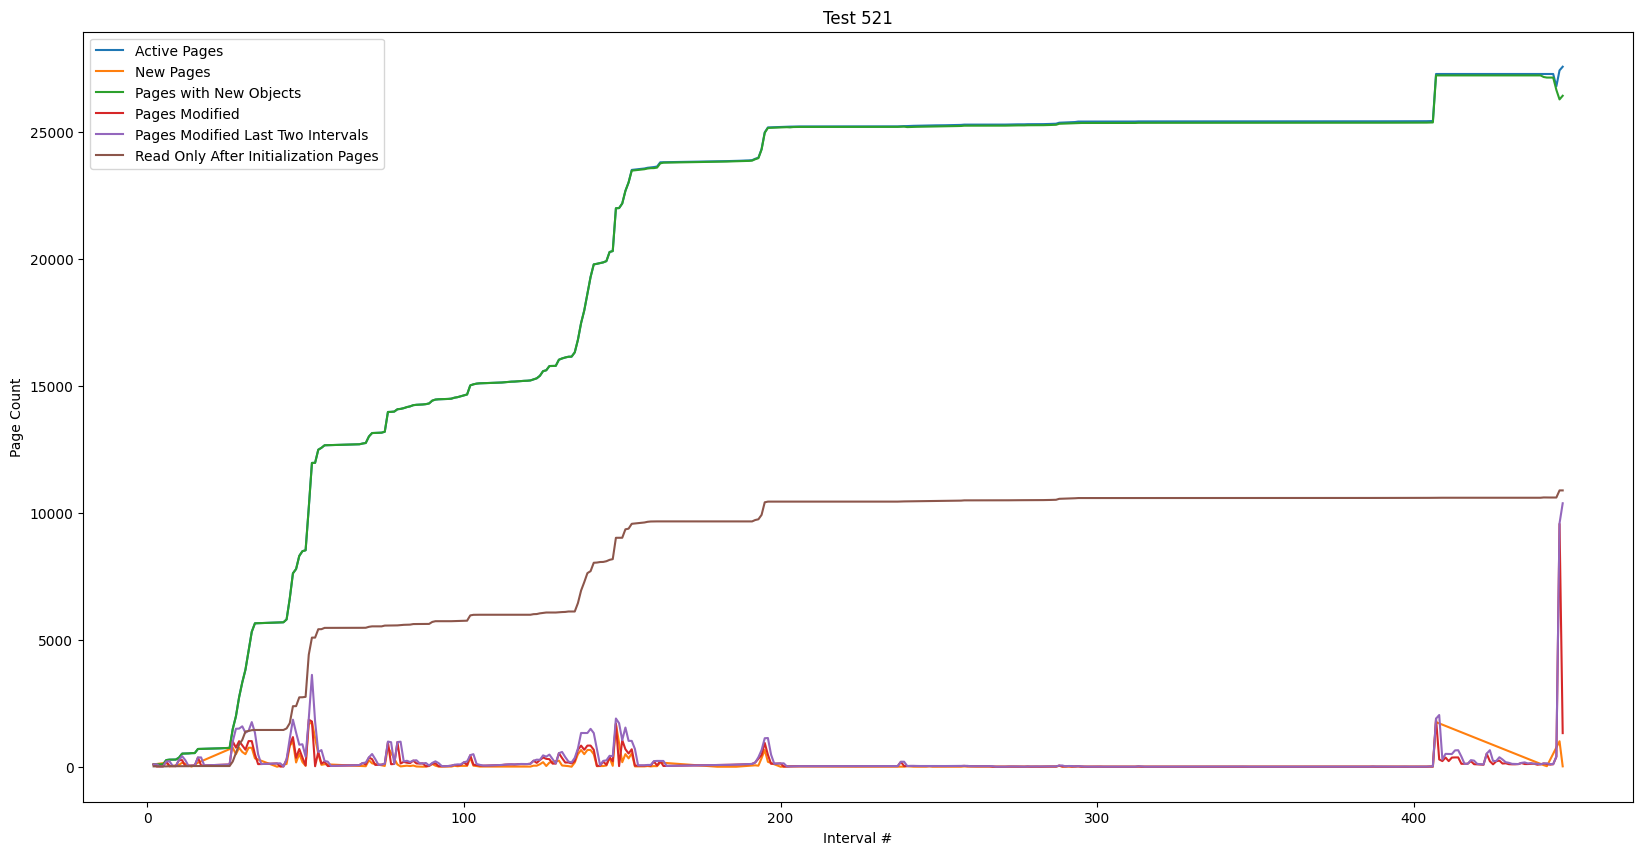

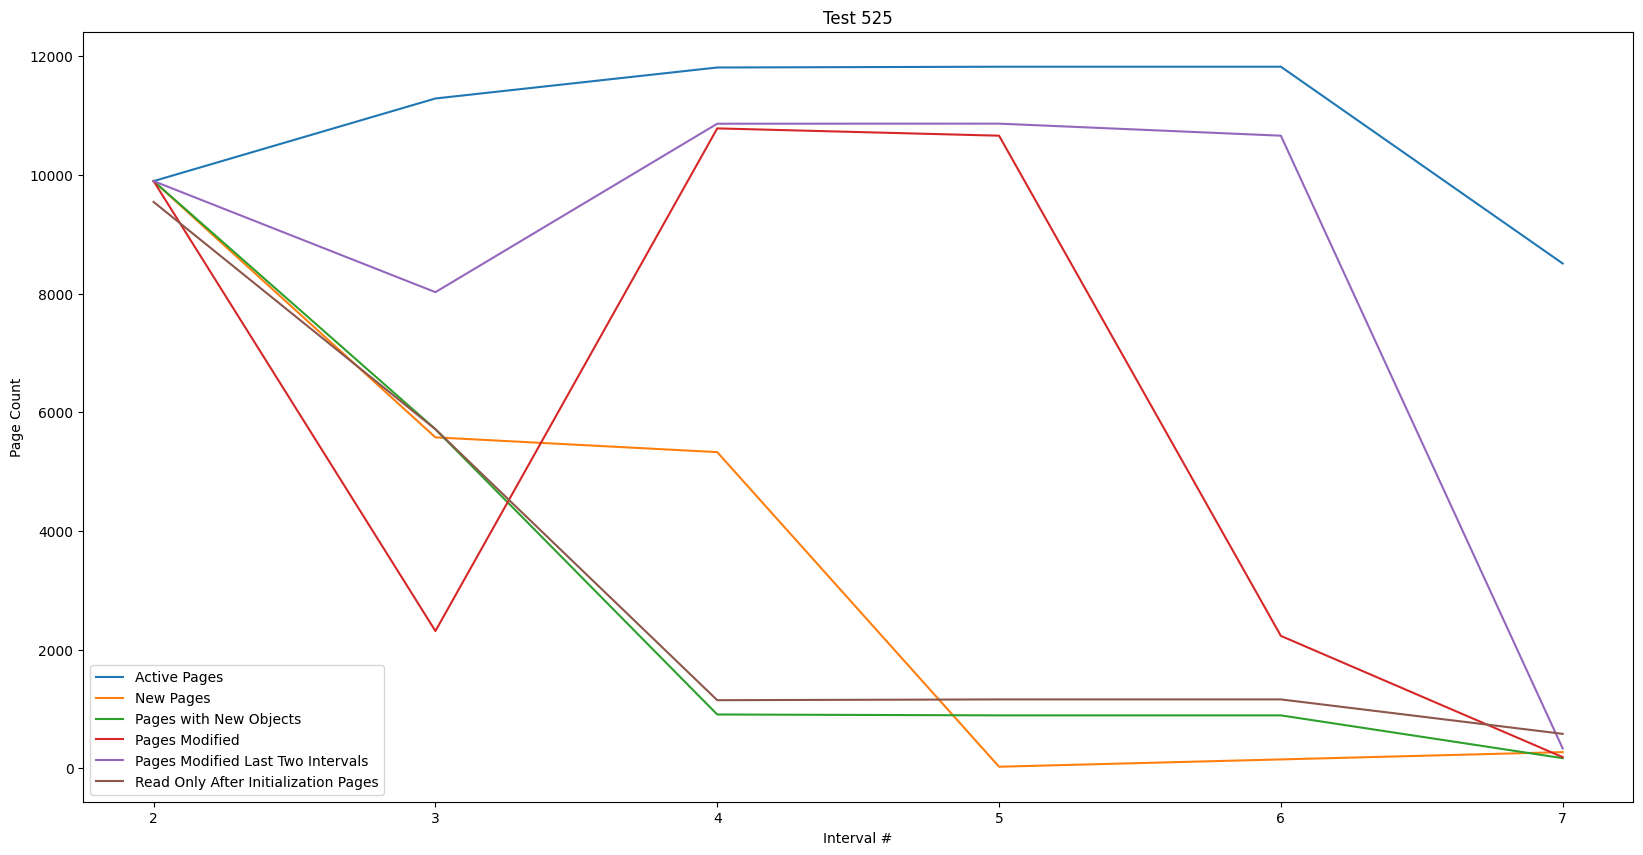

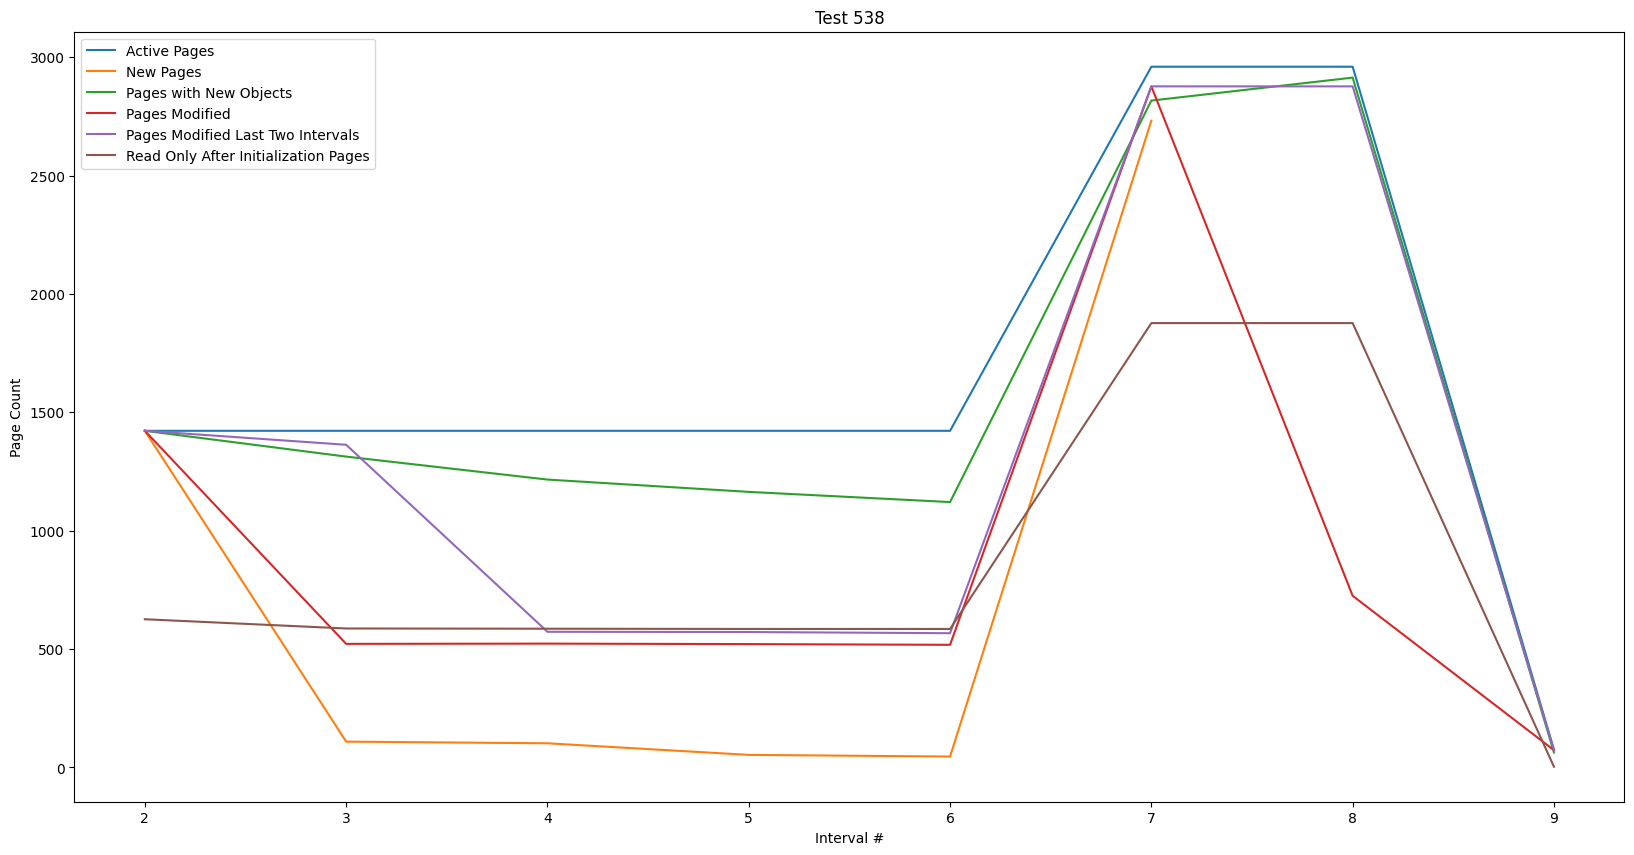

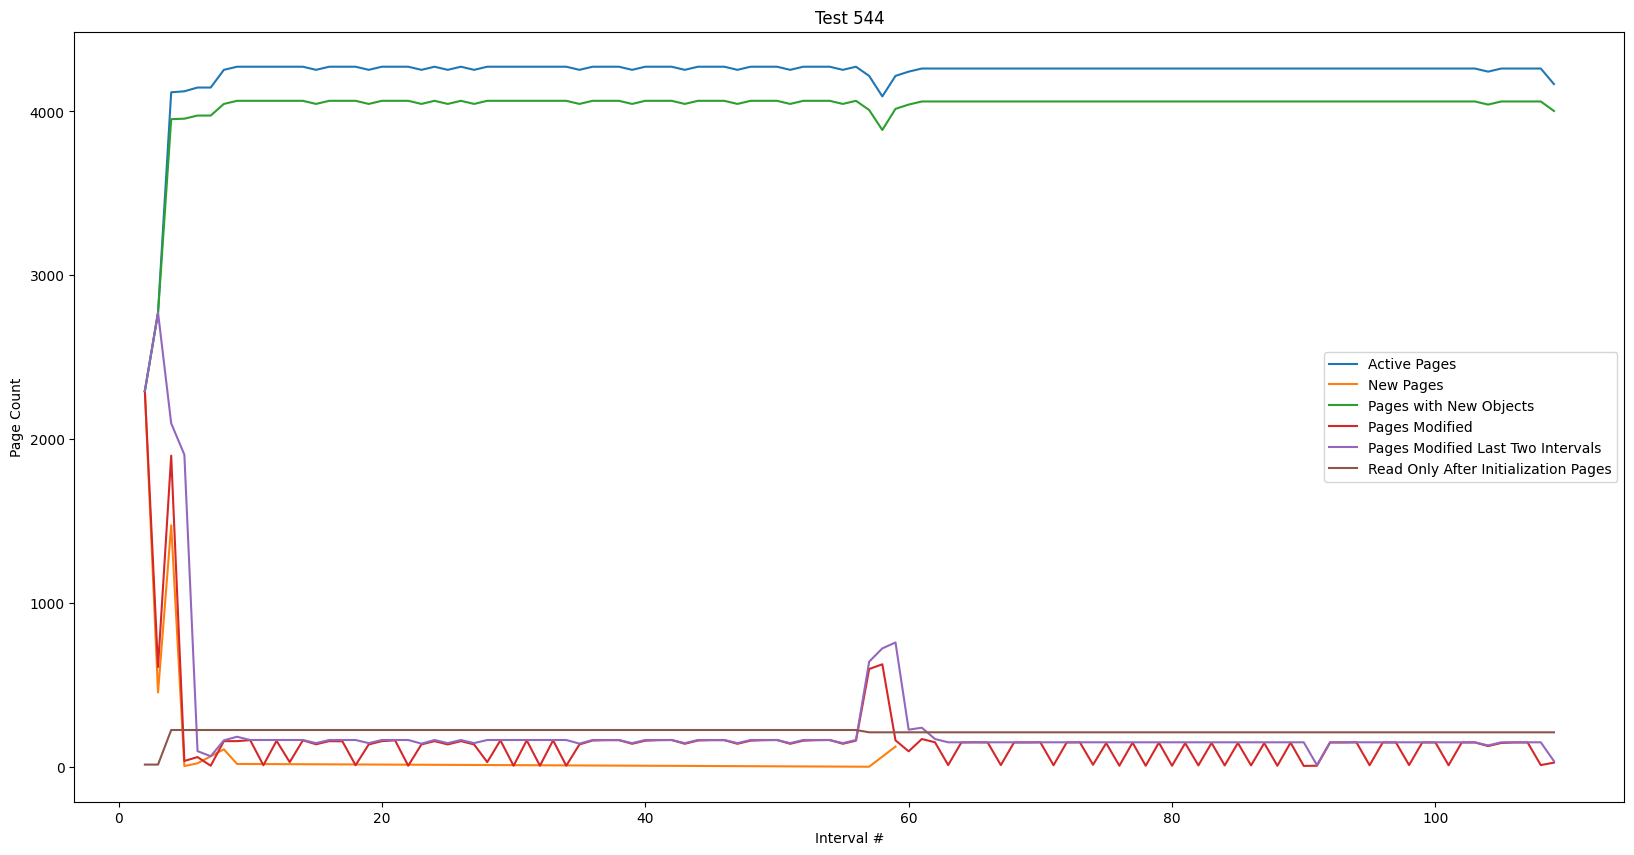

In [6]:
# Show a line graph with a line for:
# Number of active pages (for each interval)
# New pages (for each interval)
# Pages with new objects
# Pages modified
# Pages that have been modified for either of the last two intervals
# Pages that have only been initialized, then not modified

for test in all_data:
    # The data for the test
    test_data = all_data[test]

    plt.figure(figsize=(20,10))
    plt.title(f"Test {test}")
    # Show the number of active pages

    # Sum the entries for each interval
    active_pages = test_data["Interval #"].value_counts().sort_index()

    # The number of new pages
    new_pages = test_data["Interval #"][test_data["Is New Page?"]].value_counts().sort_index()

    # The number of pages with new objects
    new_objects = test_data["Interval #"][test_data["Has New Objects?"]].value_counts().sort_index()

    # The number of pages modified this interval
    modified_pages = test_data["Interval #"][test_data["Modified This Interval?"]].value_counts().sort_index()

    # The number of pages modified in the last two intervals
    modified_last_two = test_data["Interval #"][test_data["Modified This Interval?"] | test_data["Modified Last Interval?"]].value_counts().sort_index()

    # The number of pages that have only been initialized, then not modified
    # This is only the pages that ONLY EVER have `Write Count` of 1

    # Get all the pages that only ever have a `Write Count` of 1
    read_only = test_data.groupby("Physical Page Address").filter(lambda x: (x['Write Count'] != 2).all())
    # Get the read only pages back into a series
    read_only = read_only["Interval #"].value_counts().sort_index()

    # Plot the data
    sns.lineplot(data=active_pages, label="Active Pages")
    sns.lineplot(data=new_pages, label="New Pages")
    sns.lineplot(data=new_objects, label="Pages with New Objects")
    sns.lineplot(data=modified_pages, label="Pages Modified")
    sns.lineplot(data=modified_last_two, label="Pages Modified Last Two Intervals")
    sns.lineplot(data=read_only, label="Read Only After Initialization Pages")
    plt.xlabel("Interval #")
    plt.ylabel("Page Count")

    plt.legend()
    plt.show()


In [3]:
# The data is stored in a 5XX.csv for the serial tests, and 6XX.csv for the parallel tests
# The data files are in the `/data` folder

DIRECTORY = "data/page-liveness-test"

# A structure for storing the data
all_data = {}

for i in range(500, 600):
    if os.path.isfile(f"{DIRECTORY}/{i}.csv"):
        all_data[i] = pd.read_csv(f"{DIRECTORY}/{i}.csv")
        print(f"Loaded data for test {i}")

Loaded data for test 500
Loaded data for test 502
Loaded data for test 505
Loaded data for test 507
Loaded data for test 510
Loaded data for test 511
Loaded data for test 520
Loaded data for test 525
Loaded data for test 526
Loaded data for test 527
Loaded data for test 531
Loaded data for test 538
Loaded data for test 541
Loaded data for test 544
Loaded data for test 548
Loaded data for test 549


Done with test 500
Done with test 502
Done with test 505
Done with test 507
Done with test 510
Done with test 511
Done with test 520
Done with test 525
Done with test 526
Done with test 527
Done with test 531
Done with test 538
Done with test 541
Done with test 544
Done with test 548
Done with test 549


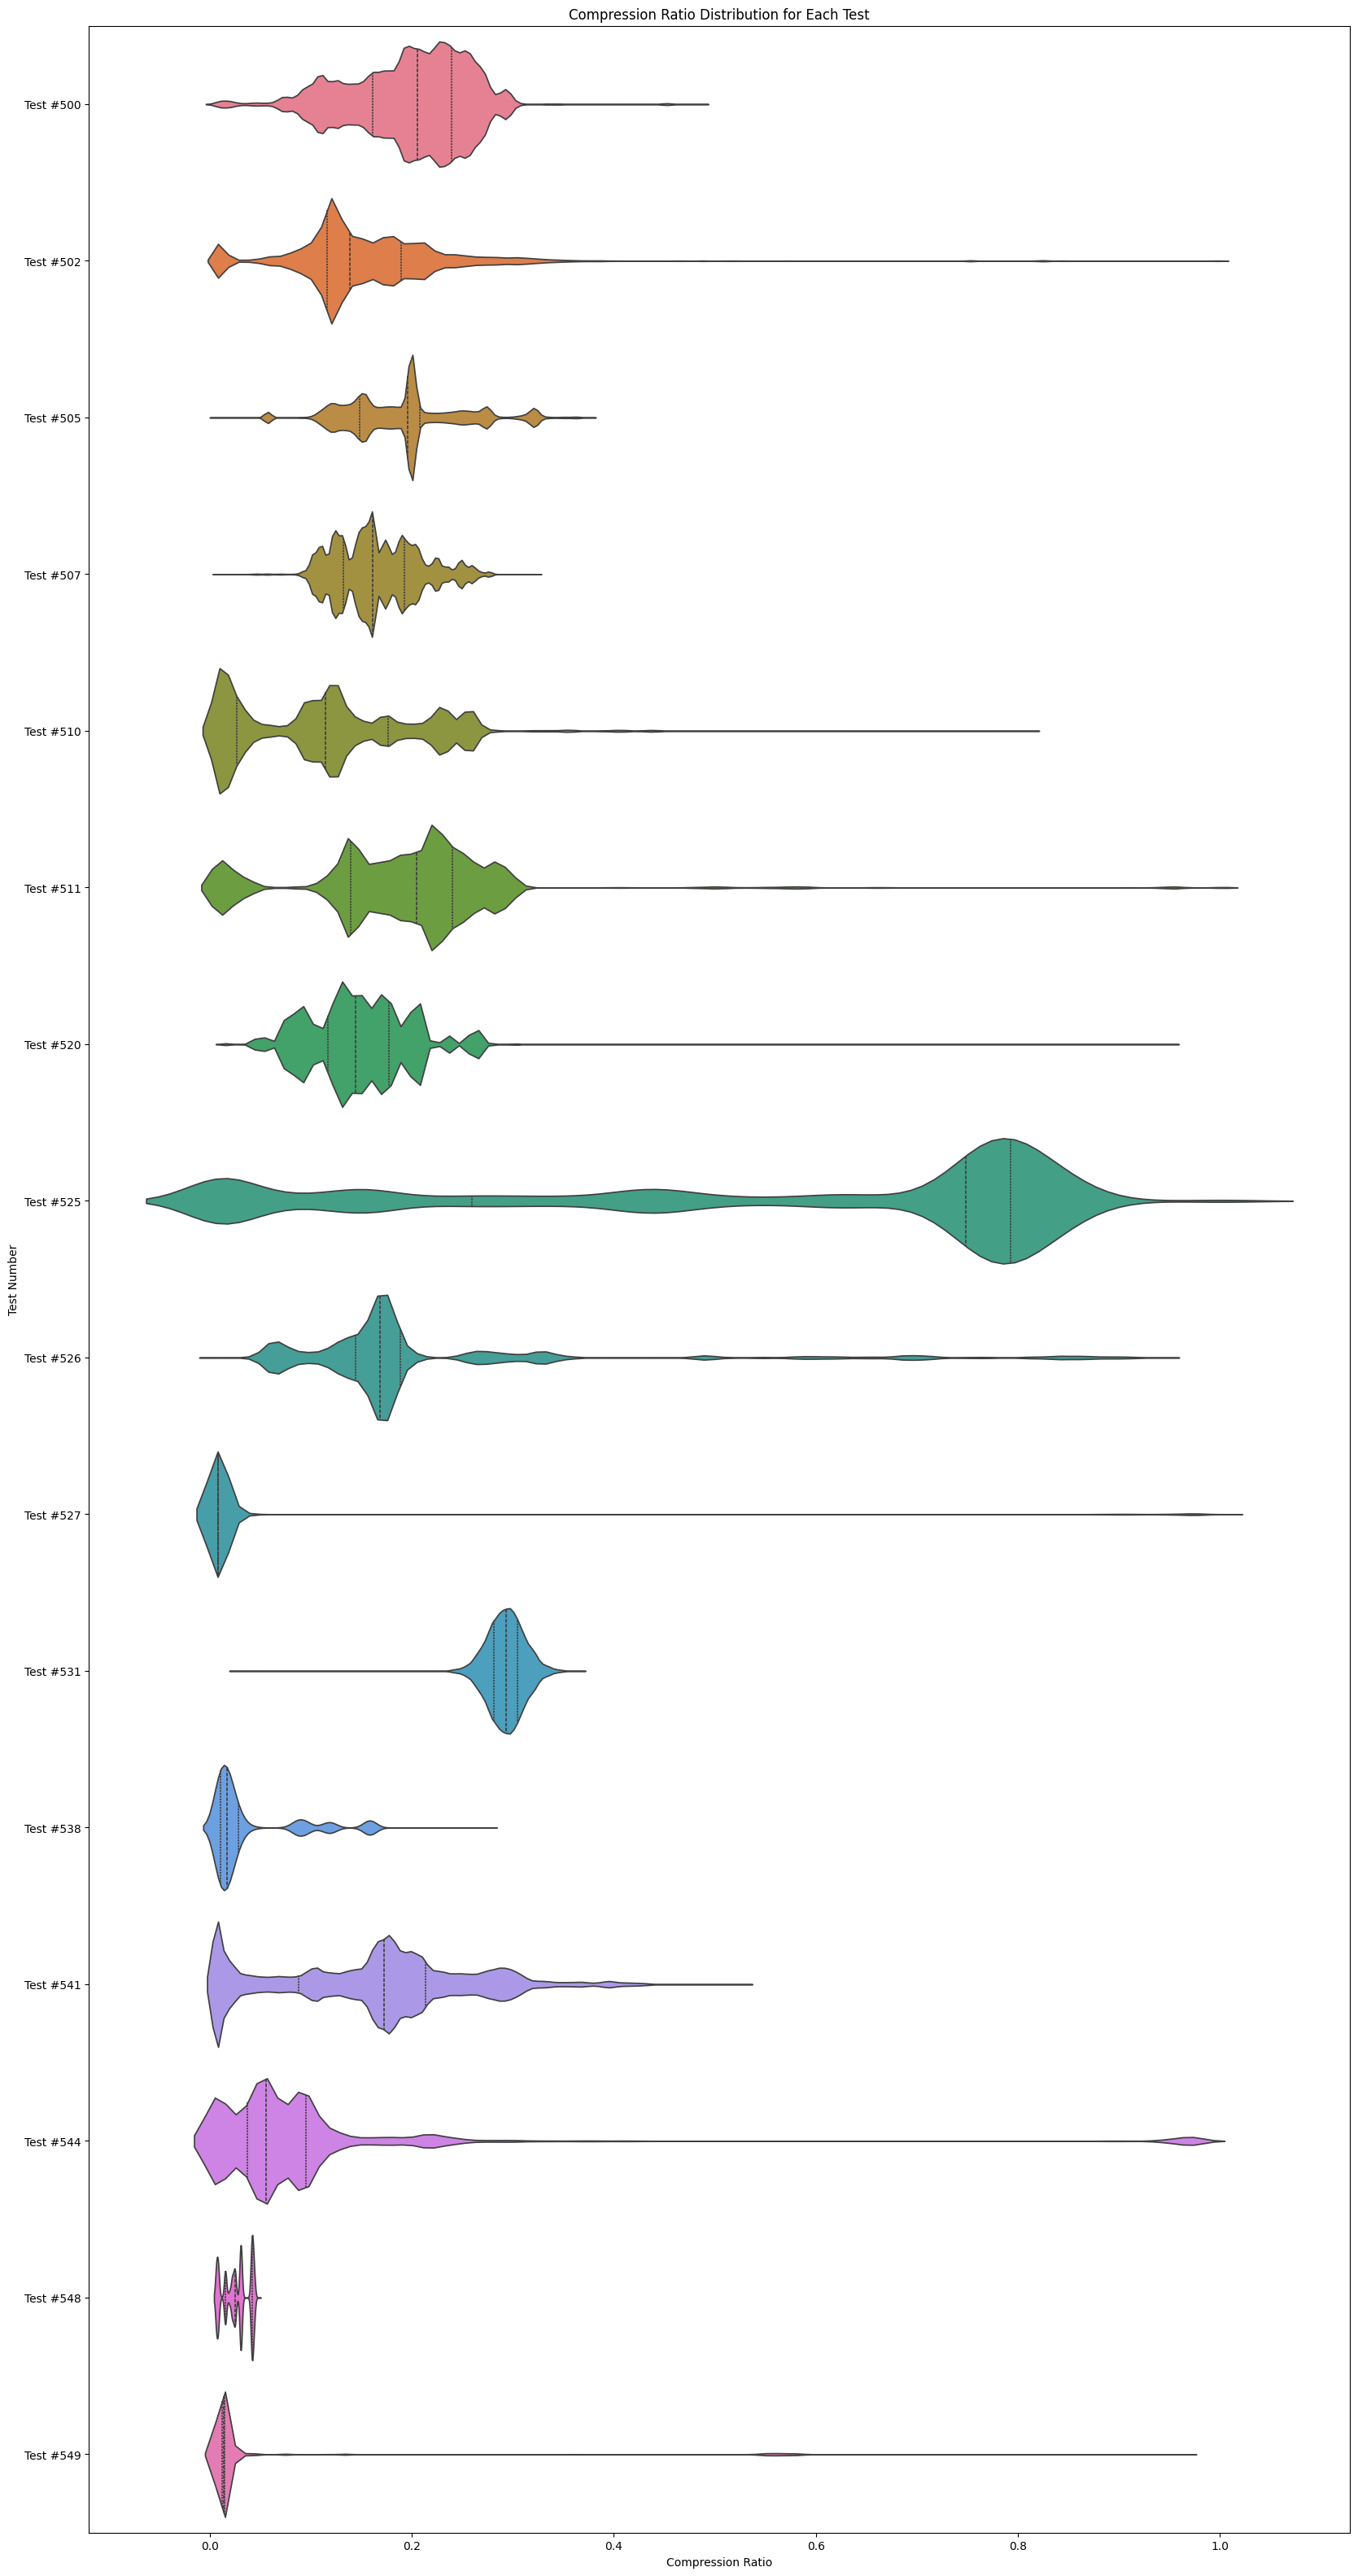

In [4]:
plt.figure(figsize=(20, 40))
all_tests = pd.DataFrame()
for test_number in all_data.keys():
    test_data = all_data[test_number]
    # Show a violin graph with the compression ratio for each page throughout all intervals
    # Get the compressed sizes of the pages by getting their compression savings in bytes, and subtracting that from the page size (4096)
    test_data["Compressed Size"] = 4096 - test_data["Compression Savings (bytes)"]
    # Get the compression ratio by dividing the compressed size by the original size
    test_data["Compression Ratio"] = test_data["Compressed Size"] / 4096
    # Add the test number to the data
    test_data["Test Number"] = f"Test #{test_number}"
    all_tests = pd.concat([all_tests, test_data])
    print("Done with test", test_number)
ax = sns.violinplot(data=all_tests, x="Compression Ratio", y="Test Number", hue="Test Number", inner="quartile")
# Label with the test number

plt.xlabel("Compression Ratio")
plt.ylabel("Test Number")
plt.title("Compression Ratio Distribution for Each Test")
plt.show()